## Lab 4 - Prototypicality

This lab must be done **individually**. The required packages have been imported for you below.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy import spatial  

**Optional**: Uncomment the following line of code to sanity-check your `pearsonr` function below.

In [7]:
#from scipy.stats import pearsonr

Data adapted from Leuven Concept Database (De Deyne et al., 2008). 

Import data for the lab. 

**Hint**: Check what these variables are by printing them out.

In [11]:
with open("data-prototypicality.pickle", "rb") as f:
    birdnames, F, goodness, features = pickle.load(f) 
    print (birdnames)
    print (F)
    print (goodness)
    print (features)
    print (len(features))

['eagle', 'dove', 'duck', 'pheasant', 'turkey', 'canary', 'chicken', 'crow', 'seagull', 'blackbird', 'sparrow', 'stork', 'parrot', 'parakeet', 'peacock', 'pelican', 'penguin', 'robin', 'woodpecker', 'ostrich', 'owl', 'falcon', 'swan']
[[0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 [4 0 0 ... 1 3 0]
 ...
 [1 1 0 ... 1 1 1]
 [1 0 1 ... 0 0 1]
 [0 1 1 ... 0 0 0]]
[1.75 1.46 3.24 2.69 4.09 1.42 4.02 1.97 1.77 1.43 1.18 3.1  2.07 1.53
 3.31 2.98 4.53 1.02 1.78 4.12 2.96 1.96 3.16]
['\ufeffis attracted by shiny objects', 'is a scavenging animal', 'endangered species', 'is bluish grey', 'builds nests', 'vomits pellets', 'brings children', 'hatches out other eggs', 'is brown/black', 'is a thief', 'carries a ring', 'floats on water', 'eats berries', 'eats bread', 'eats fruit', 'eats grain', 'eats insects', 'eats frogs', 'eats small animals', 'eats mice', 'eats fish', 'eats worms', 'eats seed', 'there are many kinds of it', 'filtrate food out of the water with its bill', 'sings (whistles)', 'is used in 

### Task 1 [0.5 pt]

Calculate the prototype feature vector from all birds, using the `F` variable.

In [10]:
# Write your code here.
''' axis = 1 to calculate the mean of each row '''
featureVector = np.mean(F, axis = 1)
print(featureVector)
print(len(featureVector))

[0.04347826 1.         0.95652174 0.2173913  3.73913043 0.17391304
 0.17391304 0.52173913 0.95652174 0.08695652 2.08695652 0.65217391
 1.04347826 2.04347826 1.04347826 1.73913043 1.91304348 0.34782609
 1.         0.56521739 0.91304348 1.82608696 1.65217391 1.47826087
 0.30434783 0.69565217 0.26086957 0.39130435 0.43478261 0.34782609
 0.86956522 0.56521739 4.         1.47826087 1.91304348 0.95652174
 0.43478261 0.17391304 1.2173913  0.73913043 0.82608696 0.17391304
 4.         3.95652174 0.52173913 0.43478261 0.2173913  1.91304348
 1.39130435 0.34782609 0.34782609 0.69565217 0.17391304 0.26086957
 1.17391304 0.17391304 4.         1.65217391 3.91304348 4.
 0.7826087  0.26086957 0.47826087 0.43478261 0.13043478 1.47826087
 0.         0.73913043 2.08695652 4.         0.60869565 0.39130435
 0.65217391 0.73913043 1.04347826 0.56521739 0.69565217 0.34782609
 1.56521739 1.86956522 1.52173913 1.         0.60869565 0.86956522
 2.04347826 3.17391304 0.65217391 0.47826087 1.73913043 0.17391304
 1.

### Task 2 [1 pt]
Calculate Euclidean distance of each bird to the prototype feature vector. 

**Hint**: use `spatial.distance.euclidean(x,y)`.

In [14]:
# Write your code here.
'''
F.transpose() will change the columns into the rows, and rows turns into columns
Then each row has all the feature values for that bird
'''
euclideanDistanceForAllBirds = []
birdFeatureVectors = F.transpose()
for birdFeature in birdFeatureVectors:
    euclideanDistance = spatial.distance.euclidean(featureVector, birdFeature)
    euclideanDistanceForAllBirds = np.append(euclideanDistanceForAllBirds, euclideanDistance)
print (euclideanDistanceForAllBirds)

[17.90971898 16.58762606 17.78792309 13.27376422 16.42563583 13.88999449
 16.28741149 11.51451784 13.40576577 13.91032582 13.12388262 17.31728815
 15.56533884 12.9555004  14.82863678 17.77692053 18.17479715 12.38939726
 12.01527069 15.4377217  16.82833375 16.13453598 15.33174425]


In [15]:
def pearsonr(a, b):
    # Write your code here.
    numerator = np.cov(a, b)[0][1]
    denominator = a.std() * b.std()
    corr = numerator / denominator
    return corr

### Task 4 [1 pt]

Calculate and report the Pearson correlation between empirical ratings in "goodness" and distances of birds to prototype.

In [16]:
# Write your code here.
'''
scipy.stats.pearsonr(x, y) returns two values
rfloat: Pearson’s correlation coefficient
p-valuefloat: two-tailed p-value
p-value value is not useful in this context
'''
corr = pearsonr(goodness, euclideanDistanceForAllBirds)
print ("The Pearson Correlation value is: ", corr)

The Pearson Correlation value is:  0.6063551169150772


### Task 5 & Task 6 [2 pts]
**Task 5**: Scatter-plot "goodness" ratings (y-axis) against distances of birds to prototype (x-axis); label both axes. **[1 pt]**

**Task 6**: Fit a line to these data points and show that line on the plot. **[1 pt]**

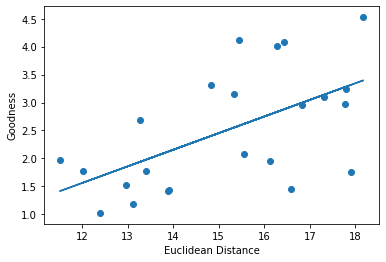

In [17]:
# Write your code here.
# Task 5
plt.scatter(euclideanDistanceForAllBirds, goodness)
plt.xlabel("Euclidean Distance")
plt.ylabel("Goodness")

# Task 6
linefit = np.polyfit(euclideanDistanceForAllBirds, goodness, 1)
slope = linefit[0]
intercept = linefit[1]
y = slope * euclideanDistanceForAllBirds + intercept
plt.plot(euclideanDistanceForAllBirds, y)
plt.show()

### Task 7 [3 pts]
**Task 7**: a) Propose and justify a simple method of improving the correlation; b) Implement your proposal and show it works. **[3 pts]**


In [18]:
# Write your solution here.
# Task 7.a
'''
Computing the feature vector using median instead of mean.
This will help driving up the pearson correlation value, 
as it will filter out the outliers.

For example, in our F variables for some features (Row 0),
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
majority of the population doesn't have that feature, 
yet we still need to consider it when computing the average as some outlier has it.
'''

# Task 7.b
featureVector = np.median(F, axis = 1)
print("Feature Vectors: \n", featureVector)

euclideanDistanceForAllBirds = []
birdFeatureVectors = F.transpose()
for birdFeature in birdFeatureVectors:
    euclideanDistance = spatial.distance.euclidean(featureVector, birdFeature)
    euclideanDistanceForAllBirds = np.append(euclideanDistanceForAllBirds, euclideanDistance)
    
newCorr = pearsonr(goodness, euclideanDistanceForAllBirds)
print ("The old Pearson Correlation value is: ", corr)
print ("The new Pearson Correlation value is: ", newCorr)


Feature Vectors: 
 [0. 1. 0. 0. 4. 0. 0. 1. 1. 0. 2. 0. 1. 2. 1. 2. 2. 0. 0. 0. 0. 1. 2. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 4. 1. 2. 0. 0. 0. 1. 0. 1. 0. 4. 4. 0. 0. 0. 2.
 1. 0. 0. 0. 0. 0. 1. 0. 4. 2. 4. 4. 0. 0. 0. 0. 0. 1. 0. 0. 2. 4. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 2. 0. 0. 0. 2. 3. 0. 0. 2. 0. 0. 1. 0. 0. 0. 2.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 4. 1. 1. 0. 1. 0. 2. 4. 0. 0. 0. 0. 0.
 0. 0. 2. 0. 0. 0. 1. 1. 2. 0. 4. 0. 4. 1. 2. 4. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 4. 0. 0. 0. 1. 0. 0. 0. 4. 0. 2. 1. 1. 2. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 2. 3. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 3. 0.
 0. 0. 1. 0. 0. 4. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 2. 0. 0. 3. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
The old Pearson Correlation value is:  0.6063551169150772
The new Pearson Correlation value is:  0.6654645137464171


Export and submit a **fully executable** Python Jupyter Notebook and a PDF copy of your notebook showing all results. 